In [39]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [40]:
#importing data
rtinfo = pd.read_csv('rt.movie_info.tsv', sep = '\t', skiprows=lambda x: x == 1378)
rtinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [41]:
# Data understanding

rtinfo.info

<bound method DataFrame.info of         id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1372  1771  In the 1750s, young orphan John Mohune (Jon Wh...     NR   
1373  1772  A couple running a rideshow discover the find ...      R   
1374  1773  While working in a small nation on the Caribbe...  PG-13   
1375  1774  In the port city of Icheon, five female friend...     NR   
1376  1775  In the mid-to-late 1960s, in Washington, D.C.,...      R   

                                                  genre             director  \
0                   Act

In [42]:
# checking missing values
rtinfo.isnull().sum()

id                 0
synopsis          59
rating             2
genre              7
director         180
writer           391
theater_date     317
dvd_date         317
currency        1075
box_office      1075
runtime           26
studio           942
dtype: int64

In [43]:
#checking duplicates
rtinfo.duplicated().sum()

0

In [44]:
# checking the unique value for the currency and box office
rtinfo['currency'].unique()

array([nan, '$'], dtype=object)

In [45]:
rtinfo['box_office'].unique()

array([nan, '600,000', '41,032,915', '224,114', '134,904', '1,039,869',
       '99,165,609', '20,518,224', '1,971,135', '312,136', '201,010',
       '132,088,910', '54,100,000', '127,706,877', '10,880,926',
       '10,706,786', '35,565,975', '4,806,750', '5,051,927', '93,300,000',
       '1,000,000', '42,929,971', '13,248,477', '64,001,297', '2,974,308',
       '37,431,431', '22,715,908', '67,771,442', '19,755,422',
       '73,023,275', '4,007,792', '1,626,289', '3,998,889', '12,533,911',
       '2,839,256', '128,579,698', '5,205,343', '54,983,983',
       '21,318,194', '84,293', '8,518,148', '12,583,510', '35,000,629',
       '976,847', '37,331,031', '145,778', '63,400,000', '7,009,668',
       '80,574,010', '47,781,388', '5,600,000', '200,000', '134,455,175',
       '25,957,696', '3,200,000', '308,164', '32,741,596', '15,986,272',
       '13,710,572', '4,756,532', '42,194,060', '347,321', '7,366,736',
       '8,134,217', '72,266,306', '419,361', '1,341,151', '2,839,456',
       '121,

In [46]:
def find_matching_missing_rows(df, col1, col2):

    missing_col1 = pd.isna(df[col1])
    missing_col2 = pd.isna(df[col2])
    matching_missing_positions = missing_col1 & missing_col2
    matching_missing_rows = df[matching_missing_positions]
    return matching_missing_rows

In [47]:
rtinfo1 = rtinfo

In [48]:
missing_row =find_matching_missing_rows(rtinfo1,'currency','box_office')

In [49]:
rtinfo1 = rtinfo1.dropna(subset=['currency'])

In [50]:
rtinfo1 = rtinfo1.dropna(subset=['box_office'])

In [51]:
rtinfo1.isnull().sum()

id               0
synopsis         0
rating           0
genre            0
director        37
writer          57
theater_date     6
dvd_date         6
currency         0
box_office       0
runtime          1
studio          30
dtype: int64

In [52]:
#changing the box_office column to numeric from object datatype, by first removig the `,`
rtinfo1['box_office'] = rtinfo1['box_office'].replace({',': ''}, regex=True)
rtinfo1['box_office'] = pd.to_numeric(rtinfo1['box_office'], errors='coerce')

I checked if the rows for currency columns and box_office columns the missing value were the same,and it turn out they were the same. So i dropped the rows. i have done this by creating a function that checks the similarities between the 2 columns missing value and returns their location.

In [53]:
# checking the unique value for rating
rtinfo1['rating'].unique()

array(['R', 'PG-13', 'PG', 'NR', 'G', 'NC17'], dtype=object)

In [54]:
# checking the unique value for genre
rtinfo1['genre'].unique()

array(['Drama|Science Fiction and Fantasy', 'Comedy', 'Drama',
       'Comedy|Drama|Mystery and Suspense',
       'Action and Adventure|Drama|Science Fiction and Fantasy',
       'Art House and International|Comedy|Drama|Musical and Performing Arts',
       'Action and Adventure|Drama|Horror|Mystery and Suspense',
       'Comedy|Kids and Family|Romance', 'Mystery and Suspense',
       'Action and Adventure|Mystery and Suspense', 'Comedy|Drama',
       'Art House and International|Drama|Musical and Performing Arts',
       'Drama|Sports and Fitness', 'Comedy|Romance',
       'Comedy|Drama|Kids and Family',
       'Action and Adventure|Science Fiction and Fantasy',
       'Horror|Mystery and Suspense', 'Comedy|Kids and Family',
       'Action and Adventure|Drama',
       'Action and Adventure|Comedy|Kids and Family', 'Drama|Romance',
       'Drama|Musical and Performing Arts',
       'Drama|Horror|Mystery and Suspense|Romance',
       'Comedy|Drama|Musical and Performing Arts',
       'A

In [55]:
# replacing of categories for rating to only 4 categories
rtinfo1['rating'] = rtinfo1['rating'].replace('PG-13', 'PG')
rtinfo1['rating'] = rtinfo1['rating'].replace('NC17', 'R')

In [56]:
rtinfo1['rating'].unique()

array(['R', 'PG', 'NR', 'G'], dtype=object)

In [57]:
# checking the unique value for currency
rtinfo1['currency'].unique()

array(['$'], dtype=object)

In [58]:
rtinfo2 = rtinfo1

I have created a new data frame named genre_revenue, where it contains only the genre and the box office revenue. so first i have splitted the genre for each move and i have share the revenue for each move to the different category of genre it contain. then i have summed the box office revenue for each genre type.

In [59]:
rtinfo2['genre'] = rtinfo2['genre'].str.split('|')

rtinfo2= rtinfo2.explode('genre')

genre_revenue = rtinfo2.groupby('genre')['box_office'].sum().reset_index()
genre_revenue = genre_revenue.sort_values(by='box_office', ascending=False)

In [60]:
rtinfo2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,134904,117 minutes,NaN


In [61]:
#i am changing the runtime column to numeric one by eliminating the minute text
rtinfo2 = rtinfo2.dropna(subset=['runtime'])
rtinfo2['runtime'] = rtinfo2['runtime'].str.extract(r'(\d+)').astype(int)

In [62]:
#i am removing the nan value from studio
rtinfo2 = rtinfo2.dropna(subset=['studio'])

In [63]:
rtinfo2['genre'].unique()

array(['Drama', 'Science Fiction and Fantasy', 'Comedy',
       'Mystery and Suspense', 'Action and Adventure',
       'Art House and International', 'Musical and Performing Arts',
       'Horror', 'Kids and Family', 'Romance', 'Sports and Fitness',
       'Western', 'Documentary', 'Special Interest', 'Animation',
       'Cult Movies', 'Classics', 'Faith and Spirituality', 'Television'],
      dtype=object)

In [64]:
 genre_revenue

,genre,box_office
7,Drama,5012609710
4,Comedy,4792479635
0,Action and Adventure,4210606962
12,Mystery and Suspense,2500649278
14,Science Fiction and Fantasy,2322257940
13,Romance,1915012952
10,Kids and Family,1738211614
1,Animation,957807403
9,Horror,638935657
11,Musical and Performing Arts,176852052


In [65]:
#changing the box_office column to numeric one
genre_revenue['box_office'] = pd.to_numeric(genre_revenue['box_office'])
print(genre_revenue.dtypes)

genre         object
box_office     int64
dtype: object


In [66]:
#splitting the threatre date into month and year column. for better readability
rtinfo2['theater_date'] = pd.to_datetime(rtinfo2['theater_date'])
rtinfo2['Theatre_Year'] = rtinfo2['theater_date'].dt.year
rtinfo2['Theatre_Month'] = rtinfo2['theater_date'].dt.month_name()

In [67]:
rtinfo2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,Theatre_Year,Theatre_Month
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108,Entertainment One,2012.0,August
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108,Entertainment One,2012.0,August
6,10,Some cast and crew from NBC's highly acclaimed...,PG,Comedy,Jake Kasdan,Mike White,2002-01-11,"Jun 18, 2002",$,41032915,82,Paramount Pictures,2002.0,January
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,"Oct 2, 2007",$,224114,123,Sony Pictures Classics,2006.0,April
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy,George Hickenlooper,Norman Snider,2010-12-17,"Apr 5, 2011",$,1039869,108,ATO Pictures,2010.0,December


#how is the distribution of box office revenue

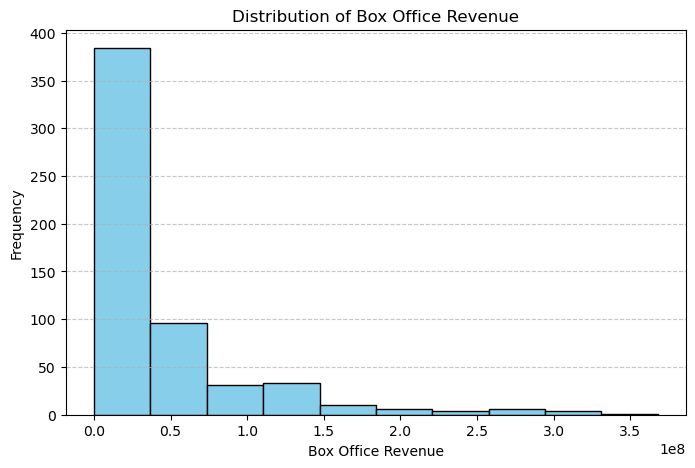

In [68]:
plt.figure(figsize=(8, 5))
plt.hist(rtinfo2['box_office'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Box Office Revenue')
plt.xlabel('Box Office Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This plot shows the distribution of the box office revenue. It can be seen a right skewed distribution. 
indicating that the movie industry is dominated by low grossing movies. the one that gross a lot of revenue are very few.

#which genre has high box office revenue?

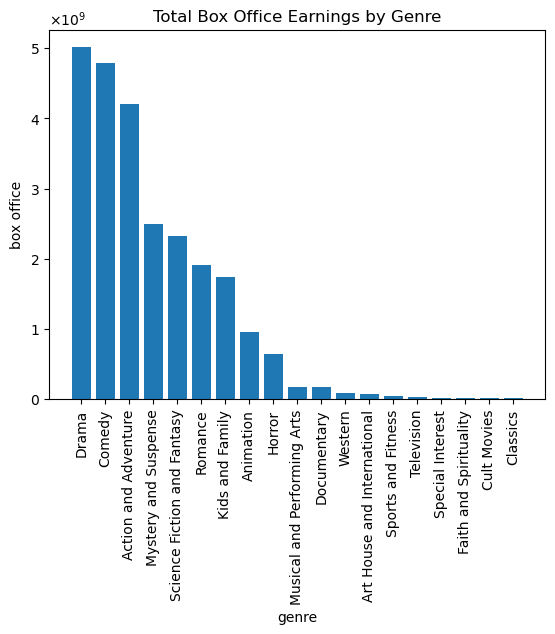

In [69]:
plt.bar( genre_revenue['genre'], genre_revenue['box_office'])
plt.title('Total Box Office Earnings by Genre')
plt.xlabel('genre')
plt.ylabel('box office')
plt.xticks(rotation=90)
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.show()

this plot shows the type of genre and the money they generate at the box office. it looks that drama, comedy and action and adventure are the top 3.

#How is the variability of box office revenue for each genre?

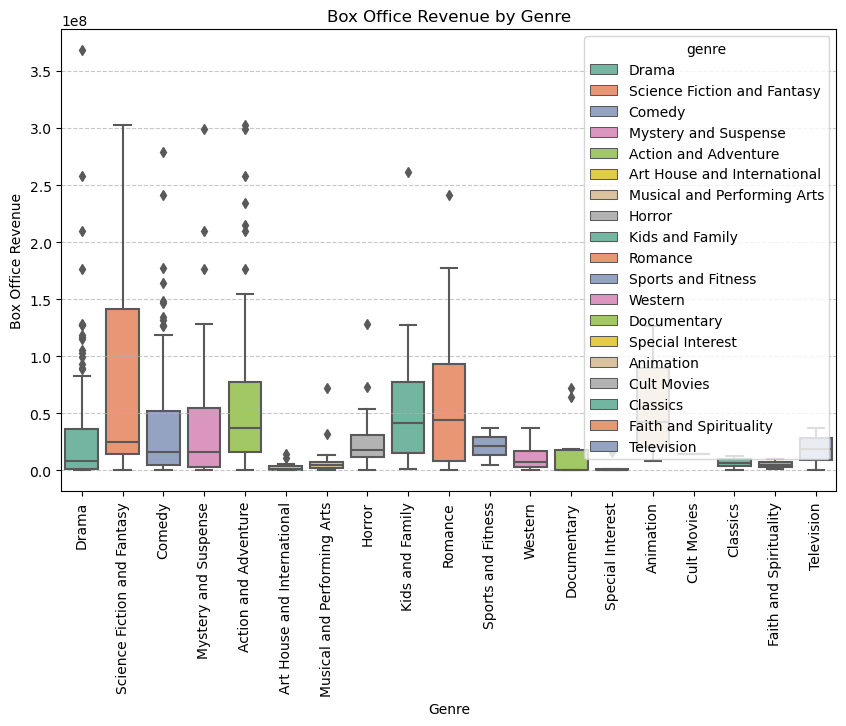

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=rtinfo2,
     x='genre', 
    y='box_office', 
    hue='genre',  
    palette='Set2',  
    dodge=False 
)
plt.title('Box Office Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Box Office Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

this is a box plot for each genre by box office revenue. It can be seen that there exist a lot of variabity especially for the firsst 5 genres, since they have a lot outliers.It ca also seen that the most grossing movies are in those categories of genre. But this does not mean that all movies in that category of genre have generated good revenue. 

#How does the box office revenue behaves over the production year for each genre?

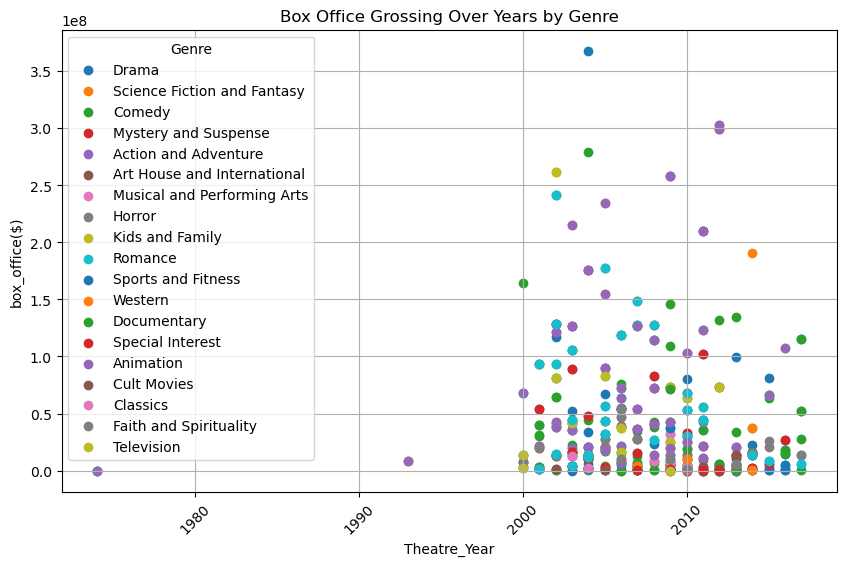

In [71]:
genres = rtinfo2['genre'].unique()


plt.figure(figsize=(10, 6))
for genre in genres:
    genre_data = rtinfo2[rtinfo2['genre'] == genre]
    plt.scatter(genre_data['Theatre_Year'], genre_data['box_office'], marker='o', label=genre)

plt.title('Box Office Grossing Over Years by Genre')
plt.ylabel('box_office($)')
plt.xlabel('Theatre_Year')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.grid(True)
plt.show()

this plot shows the distribution of movie genre over the years based on the box office grossing. it seems that most movie had high grossing from 2000 to 2010, especially for drama, comedy and action and adventure.

#how does box office revenue behaves after 2000 by considering the number of movies for each genre?

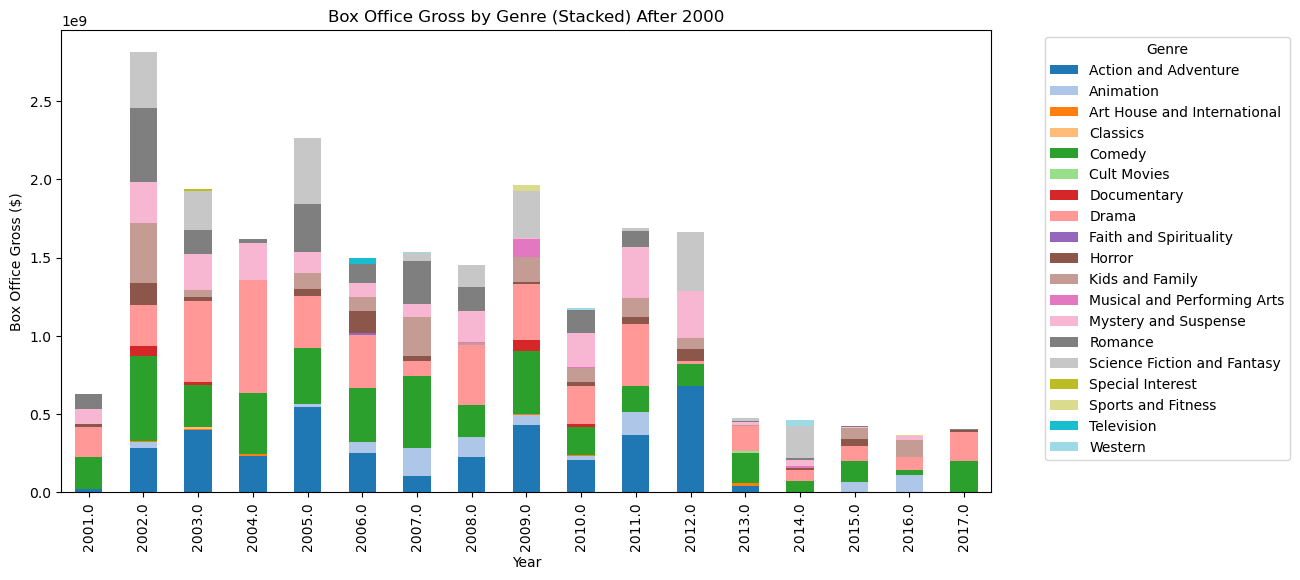

In [72]:
filtered_df = rtinfo2[rtinfo2['Theatre_Year'] > 2000]


pivot_df = filtered_df.pivot_table(
    index='Theatre_Year', columns='genre', values='box_office', aggfunc='sum', fill_value=0
)

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title('Box Office Gross by Genre (Stacked) After 2000')
plt.ylabel('Box Office Gross ($)')
plt.xlabel('Year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

this plot shows the distribution of movie genre over the years based on the box office grossing.i have used a stacked bar plot. it seems that most movie had high grosiing from 2002 to 2012, especially for drama, comedy and action and adventure.in recent years the box office gross has dropped considerably.

#how is the movie rating for each genre by considering the number of movies?

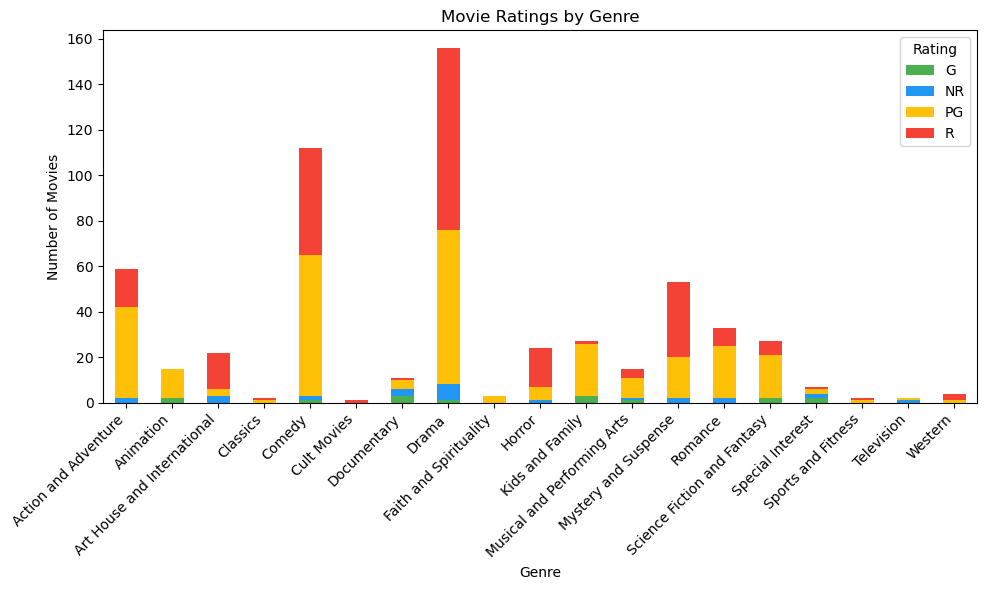

In [73]:
rating_counts = rtinfo2.groupby(['genre', 'rating']).size().unstack(fill_value=0)
rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4CAF50', '#2196F3', '#FFC107', '#F44336'])
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

this plot is a stacked bar plot for genre showing the rating. it seems that R(restricted) rating is highest for all trypes of genre , especially for drama, followed by PG(parent guidance).

# How is the box office revenue for recent years for each genre by considering the number of movies made?

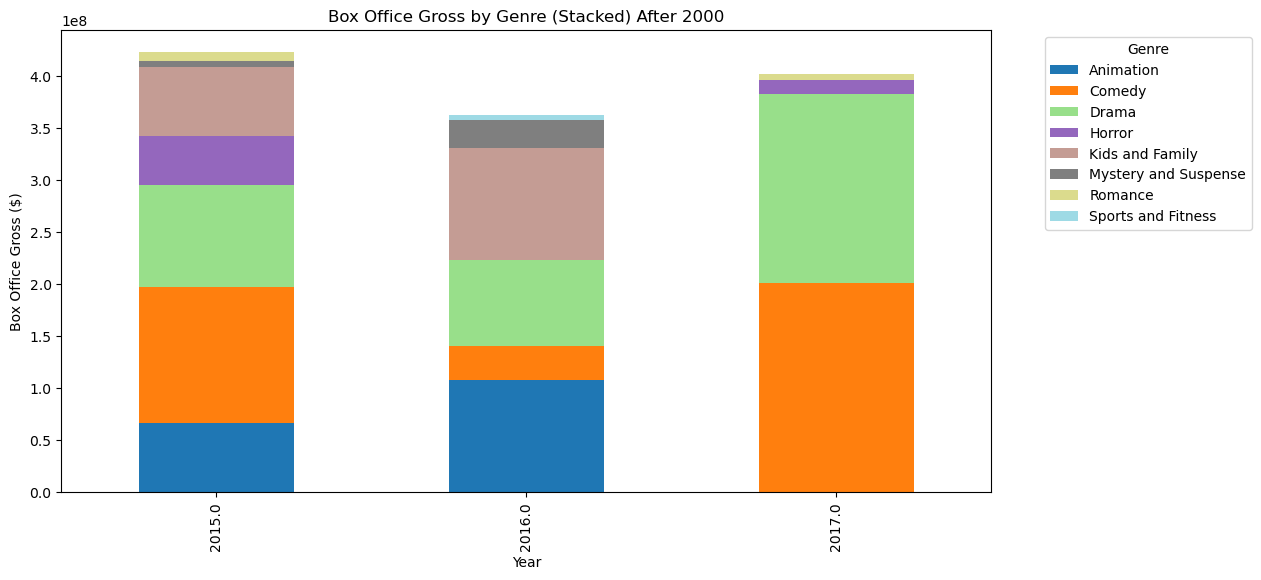

In [74]:
filtered2_df = rtinfo2[rtinfo2['Theatre_Year'] > 2014]


pivot_df = filtered2_df.pivot_table(
    index='Theatre_Year', columns='genre', values='box_office', aggfunc='sum', fill_value=0
)

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title('Box Office Gross by Genre (Stacked) After 2000')
plt.ylabel('Box Office Gross ($)')
plt.xlabel('Year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

shows the stacked bar plot for types of genre for 2015 to 2018 and the revenue generated. comedy and drama are more dominating genre.

# which top 10 studios make high box office revenue?

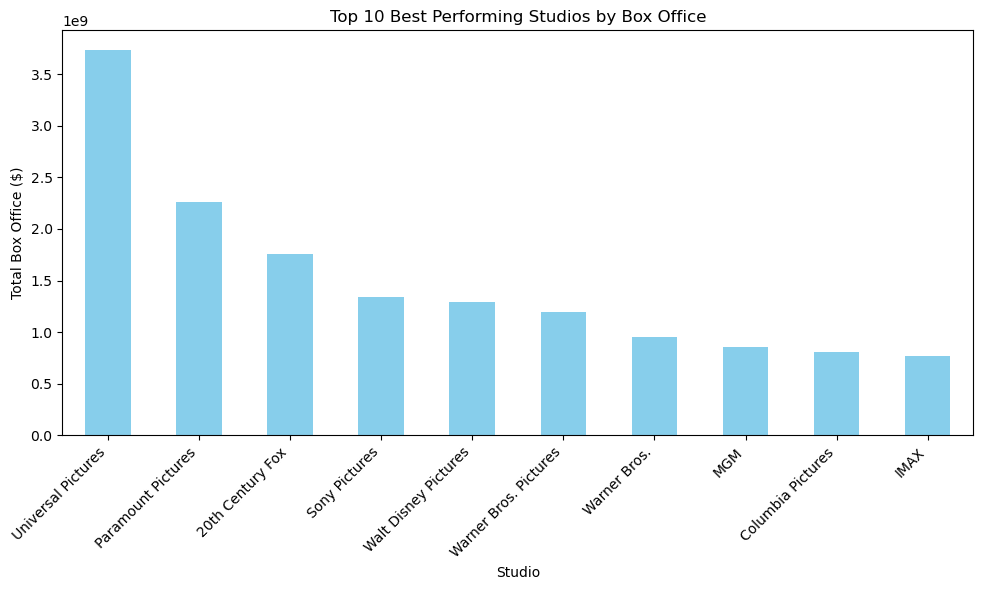

In [75]:
studio_box_office = rtinfo2.groupby('studio')['box_office'].sum().sort_values(ascending=False)
top_10_studios = studio_box_office.head(10)
fig, ax = plt.subplots(figsize=(10, 6))
top_10_studios.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Top 10 Best Performing Studios by Box Office')
ax.set_xlabel('Studio')
ax.set_ylabel('Total Box Office ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

this bar plot shows the top 10 studio that generate more revenue. and universal pictures is number 1.

#Does box office grossing depends on the runtime?

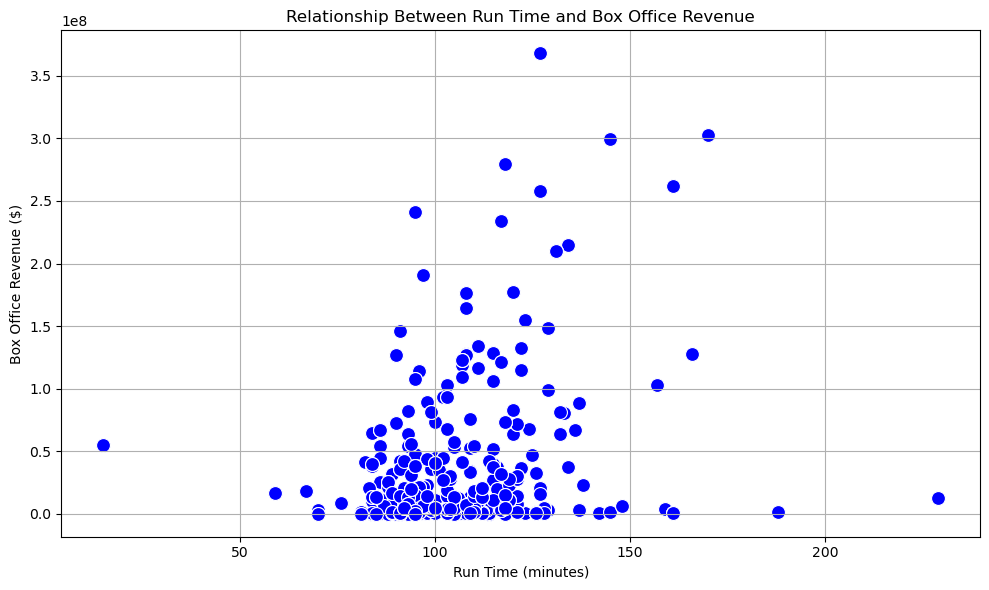

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rtinfo2, x='runtime', y='box_office', color='blue', s=100)
plt.title('Relationship Between Run Time and Box Office Revenue')
plt.xlabel('Run Time (minutes)')
plt.ylabel('Box Office Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


it shows a scatter point of runtime and revenue generated for movies. and the movies in the range 90-130minutes seem to generate more money, it comparison to the longer or shorter movies. from this graph we can observe that Run time and Box office they don't have correlation

#Does runtime vary significantly by genre?

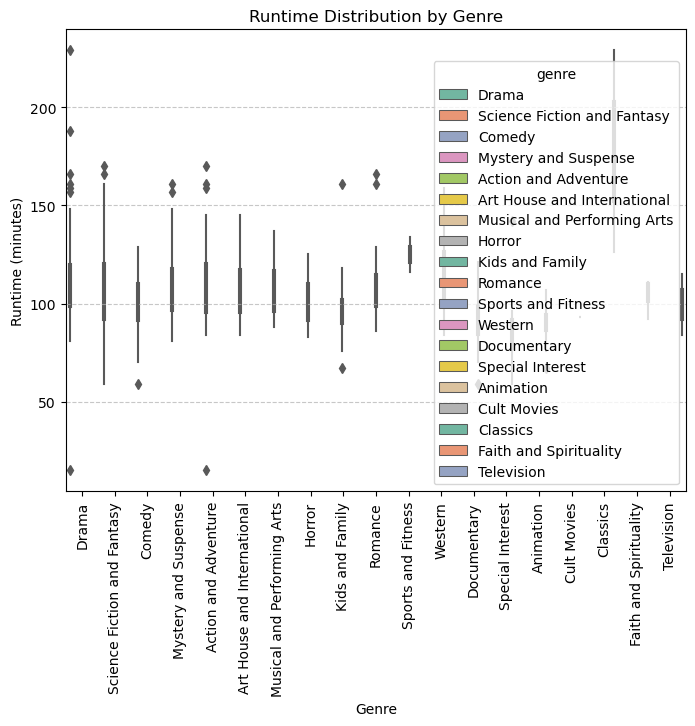

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=rtinfo2, x='genre', y='runtime',hue='genre',palette='Set2')
plt.title('Runtime Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

this box plot shows the runtime by type of genre. It can be seen that classic tend to be very long in comparison to other genre. outliers exists for every genre, but it can be seen that the median for most of the genre is around 110 to 120 minutes.

#who are the top 10 writers have high box office revenue?

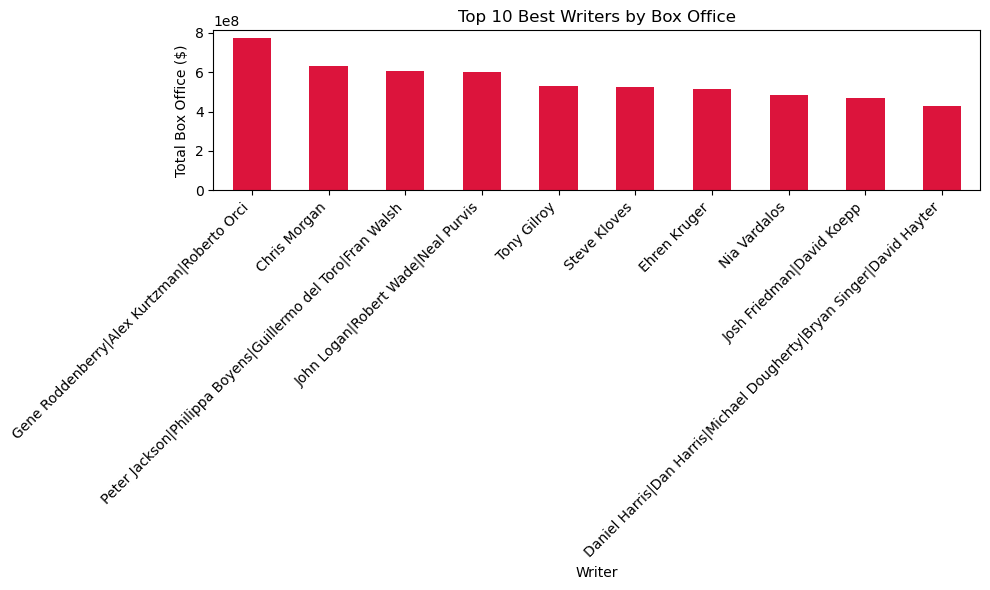

In [78]:
writer_box_office = rtinfo2.groupby('writer')['box_office'].sum().sort_values(ascending=False)
top_10_writers= writer_box_office.head(10)
fig, ax = plt.subplots(figsize=(10, 6))
top_10_writers.plot(kind='bar', ax=ax, color='#DC143C')
ax.set_title('Top 10 Best Writers by Box Office')
ax.set_xlabel('Writer')
ax.set_ylabel('Total Box Office ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Anova analysis for genre and studio vr. box office revenue

In [79]:
# this is ANOVA for genre
genres =  rtinfo2['genre'].unique()  
genre_groups = [ rtinfo2[ rtinfo2['genre'] == genre]['box_office'] for genre in genres] 
anova_genre_result = stats.f_oneway(*genre_groups)
print("ANOVA for Genre:")
print("F-statistic:", anova_genre_result.statistic)
print("P-value:", anova_genre_result.pvalue)

# this is ANOVA for studio
studios = rtinfo2['studio'].unique()  
studio_groups = [rtinfo2[rtinfo2['studio'] == studio]['box_office'] for studio in studios]  
anova_studio_result = stats.f_oneway(*studio_groups)
print("\nANOVA for Studio:")
print("F-statistic:", anova_studio_result.statistic)
print("P-value:", anova_studio_result.pvalue)

#  Result interpretation with print
alpha = 0.05
if anova_genre_result.pvalue < alpha:
    print("\nSignificant differences in box office revenue across genres.")
else:
    print("\nNo significant differences in box office revenue across genres.")

if anova_studio_result.pvalue < alpha:
    print("Significant differences in box office revenue across studios.")
else:
    print("No significant differences in box office revenue across studios.")

ANOVA for Genre:
F-statistic: 3.5356855169541497
P-value: 1.3507689986745303e-06

ANOVA for Studio:
F-statistic: 3.0434356930278406
P-value: 2.0690503088884945e-16

Significant differences in box office revenue across genres.
Significant differences in box office revenue across studios.


Anova was performed genre vr. box_office and studio vr box_office. It was concluded that box_office differ significally for different genre and studio, and this was also demostrated by the bar plots.